Acustic impule respones study
========


Copyright 2018 Jason Fu

In [78]:
from __future__ import print_function, division

%matplotlib inline

import sys
sys.path.append('../code')

import thinkdsp
import thinkplot

import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)
from copy import deepcopy

Acoustic impulse response
--

Here's a recording of a gunshot, which approximates the acoustic impulse response of the room:

No handles with labels found to put in legend.


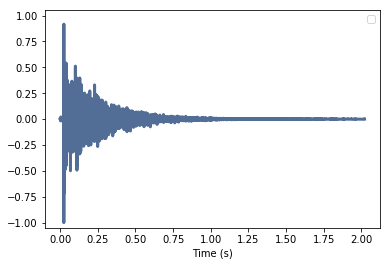

In [89]:
response = thinkdsp.read_wave('../code/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

Here's what it sounds like:

In [90]:
response.make_audio()

The DFT of the impulse response is the transfer function:

No handles with labels found to put in legend.


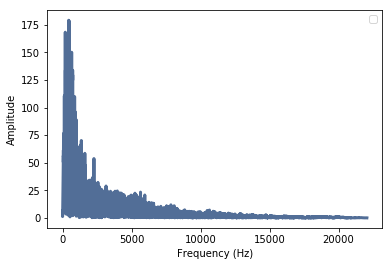

In [91]:
transfer = response.make_spectrum()
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Here's the transfer function on a log-log scale:

No handles with labels found to put in legend.


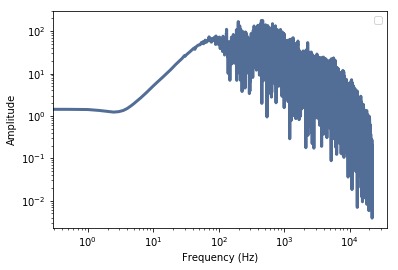

In [92]:
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude',
                 xscale='log', yscale='log')

Now we can simulate what a recording would sound like if it were played in the same room and recorded in the same way.  Here's the violin recording we have used before:

No handles with labels found to put in legend.


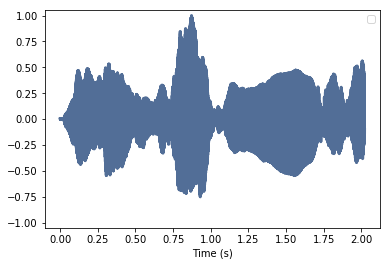

In [93]:
violin = thinkdsp.read_wave('../code/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

Here's what it sounds like before transformation:

In [94]:
violin.make_audio()

Now we compute the DFT of the violin recording.

No handles with labels found to put in legend.


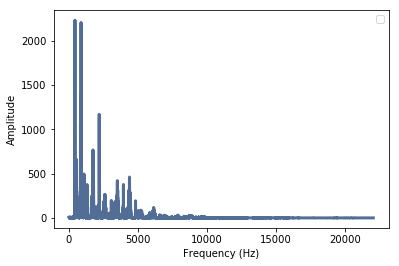

In [95]:
spectrum = violin.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

I trimmed the violin recording to the same length as the impulse response:

In [96]:
len(spectrum.hs), len(transfer.hs)

(44554, 44554)

We we can multiply in the frequency domain and the transform back to the time domain.

In [97]:
output = (spectrum * transfer).make_wave()
output.normalize()

Here's a  comparison of the original and transformed recordings:

No handles with labels found to put in legend.


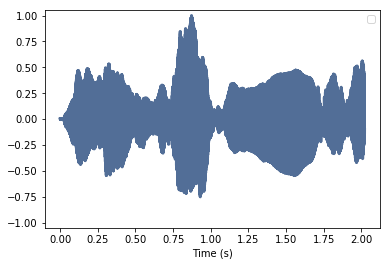

In [98]:
violin.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


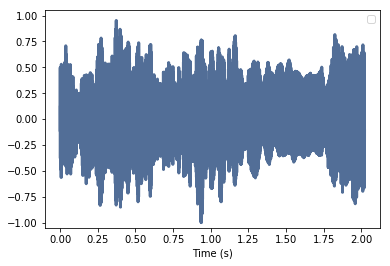

In [99]:
output.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


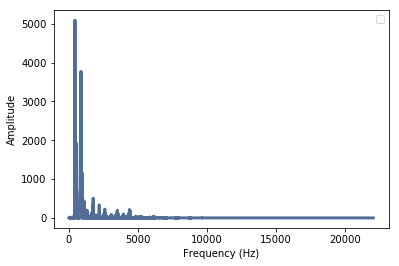

In [100]:
spectrum = output.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

And here's what it sounds like:

In [101]:
output.make_audio()

Now try to revert the response and recover the violin music

Here is the revert transfer:

In [102]:
revert_transfer = deepcopy(transfer)
revert_transfer.hs = 1 / revert_transfer.hs

No handles with labels found to put in legend.


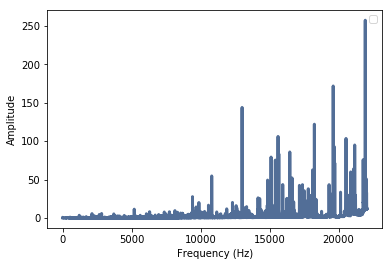

In [103]:
revert_transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

No handles with labels found to put in legend.


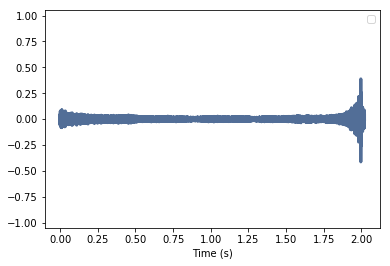

In [104]:
revert_response = revert_transfer.make_wave()
revert_response.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [105]:
revert_response.make_audio()

No handles with labels found to put in legend.


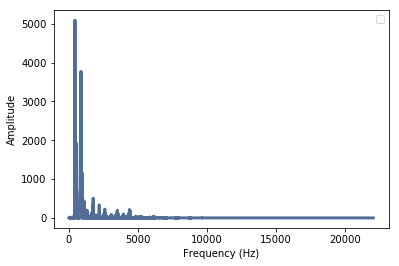

In [106]:
output_spectrum = output.make_spectrum()
output_spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

No handles with labels found to put in legend.


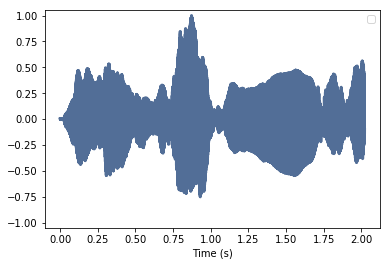

In [107]:
recoverred_violin = (output_spectrum * revert_transfer).make_wave()
recoverred_violin.normalize()
recoverred_violin.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [108]:
recoverred_violin.make_audio()

No handles with labels found to put in legend.


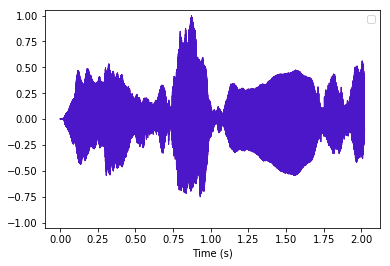

In [109]:
recoverred_violin.plot(linewidth=1, color='r')
violin.plot(linewidth=1, color='b')
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [110]:
max(violin.ys - recoverred_violin.ys)

7.101510213214368e-10

In [111]:
max(violin.ts - recoverred_violin.ts)

4.440892098500626e-16